In [26]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("yashwanthkumbam/apaddos-dataset")

print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/yashwanthkumbam/apaddos-dataset/versions/1


In [27]:
print("Dataset files:", os.listdir(path))

Dataset files: ['APA-DDoS-Dataset', 'final-pcap']


In [28]:
import os

dataset_folder = os.path.join(path, "APA-DDoS-Dataset")  # Change folder if needed
print("Files in dataset folder:", os.listdir(dataset_folder))


Files in dataset folder: ['APA-DDoS-Dataset.csv']


In [29]:
csv_file = os.path.join(dataset_folder, "APA-DDoS-Dataset.csv")  # Replace with actual filename
df = pd.read_csv(csv_file)

# Display dataset details
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151200 entries, 0 to 151199
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip.src           151200 non-null  object
 1   ip.dst           151200 non-null  object
 2   tcp.srcport      151200 non-null  int64 
 3   tcp.dstport      151200 non-null  int64 
 4   ip.proto         151200 non-null  int64 
 5   frame.len        151200 non-null  int64 
 6   tcp.flags.syn    151200 non-null  int64 
 7   tcp.flags.reset  151200 non-null  int64 
 8   tcp.flags.push   151200 non-null  int64 
 9   tcp.flags.ack    151200 non-null  int64 
 10  ip.flags.mf      151200 non-null  int64 
 11  ip.flags.df      151200 non-null  int64 
 12  ip.flags.rb      151200 non-null  int64 
 13  tcp.seq          151200 non-null  int64 
 14  tcp.ack          151200 non-null  int64 
 15  frame.time       151200 non-null  object
 16  Packets          151200 non-null  int64 
 17  Bytes     

,ip.src,ip.dst,tcp.srcport,tcp.dstport,ip.proto,frame.len,tcp.flags.syn,tcp.flags.reset,tcp.flags.push,tcp.flags.ack,...,tcp.seq,tcp.ack,frame.time,Packets,Bytes,Tx Packets,Tx Bytes,Rx Packets,Rx Bytes,Label
0,192.168.1.1,192.168.23.2,2412,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071112000 Mountain Dayli...,8,432,4,216,4,216,DDoS-PSH-ACK
1,192.168.1.1,192.168.23.2,2413,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071138000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
2,192.168.1.1,192.168.23.2,2414,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071146000 Mountain Dayli...,12,648,6,324,6,324,DDoS-PSH-ACK
3,192.168.1.1,192.168.23.2,2415,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071152000 Mountain Dayli...,10,540,5,270,5,270,DDoS-PSH-ACK
4,192.168.1.1,192.168.23.2,2416,8000,6,54,0,0,1,1,...,1,1,16-Jun 2020 20:18:15.071159000 Mountain Dayli...,6,324,3,162,3,162,DDoS-PSH-ACK


In [30]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
# Step 2: Select relevant numerical features
# Comment: Selecting numerical features for normalization while keeping the label column
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Step 3: Normalize the numerical features using MinMaxScaler
# Comment: Applying MinMaxScaler to normalize numerical features for improved clustering accuracy
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the first few rows after normalization
print(df.head())

        ip.src        ip.dst  tcp.srcport  tcp.dstport  ip.proto  frame.len  \
0  192.168.1.1  192.168.23.2     0.018594          0.0       0.0        0.0   
1  192.168.1.1  192.168.23.2     0.018611          0.0       0.0        0.0   
2  192.168.1.1  192.168.23.2     0.018628          0.0       0.0        0.0   
3  192.168.1.1  192.168.23.2     0.018644          0.0       0.0        0.0   
4  192.168.1.1  192.168.23.2     0.018661          0.0       0.0        0.0   

   tcp.flags.syn  tcp.flags.reset  tcp.flags.push  tcp.flags.ack  ...  \
0            0.0              0.0             1.0            0.0  ...   
1            0.0              0.0             1.0            0.0  ...   
2            0.0              0.0             1.0            0.0  ...   
3            0.0              0.0             1.0            0.0  ...   
4            0.0              0.0             1.0            0.0  ...   

   tcp.seq  tcp.ack                                         frame.time  \
0      0.0  

In [31]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Step 4: Preprocess frame.time for numerical computations
# Comment: Converting frame.time to Unix timestamp for accurate calculations
def convert_to_timestamp(time_str):
    try:
        return datetime.strptime(time_str.strip(), "%d-%b %Y %H:%M:%S.%f000 Mountain Daylight Time").timestamp()
    except ValueError:
        return np.nan  # Handle conversion errors gracefully

df["frame.time"] = df["frame.time"].astype(str).apply(convert_to_timestamp)

# Drop rows where frame.time couldn't be converted
df.dropna(subset=["frame.time"], inplace=True)

# Step 5: Feature Engineering - Creating new features to enhance clustering
# Comment: Creating new engineered features to enhance pattern distinction in clustering

# Compute new features
df["traffic_rate"] = df["Bytes"] / (df["frame.time"] + 1e-9)  # Avoid division by zero
df["tcp_flags_sum"] = df["tcp.flags.syn"] + df["tcp.flags.reset"] + df["tcp.flags.push"] + df["tcp.flags.ack"]
df["packet_size_ratio"] = df["Tx Bytes"] / (df["Rx Bytes"] + 1e-9)  # Avoid division by zero
df["interaction_intensity"] = df["Packets"] / (df["frame.time"] + 1e-9)

# Calculate entropy, ensuring no zero values to avoid log issues
df["flow_entropy"] = -(df["Tx Packets"] * np.log(df["Tx Packets"] + 1e-9) +
                       df["Rx Packets"] * np.log(df["Rx Packets"] + 1e-9))

# Display the first few rows after feature engineering
print(df.head())

        ip.src        ip.dst  tcp.srcport  tcp.dstport  ip.proto  frame.len  \
0  192.168.1.1  192.168.23.2     0.018594          0.0       0.0        0.0   
1  192.168.1.1  192.168.23.2     0.018611          0.0       0.0        0.0   
2  192.168.1.1  192.168.23.2     0.018628          0.0       0.0        0.0   
3  192.168.1.1  192.168.23.2     0.018644          0.0       0.0        0.0   
4  192.168.1.1  192.168.23.2     0.018661          0.0       0.0        0.0   

   tcp.flags.syn  tcp.flags.reset  tcp.flags.push  tcp.flags.ack  ...  \
0            0.0              0.0             1.0            0.0  ...   
1            0.0              0.0             1.0            0.0  ...   
2            0.0              0.0             1.0            0.0  ...   
3            0.0              0.0             1.0            0.0  ...   
4            0.0              0.0             1.0            0.0  ...   

   Tx Packets  Tx Bytes  Rx Packets  Rx Bytes         Label  traffic_rate  \
0    0.33

In [32]:
!pip install ace_tools

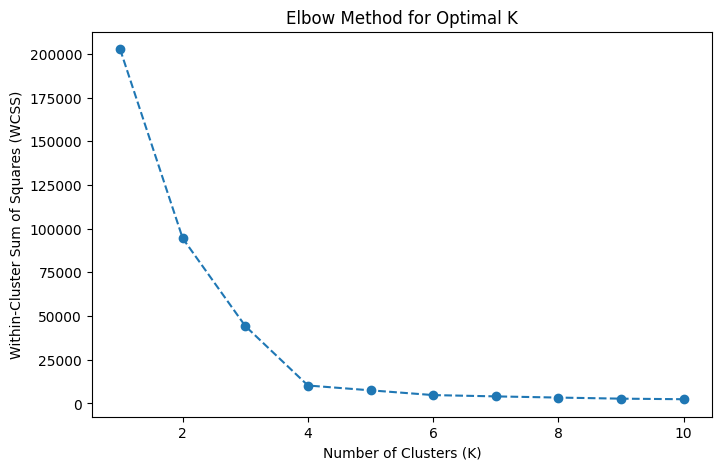

In [33]:
# Re-load necessary libraries after execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

# Reload the dataset
csv_file = os.path.join(dataset_folder, "APA-DDoS-Dataset.csv")  # Replace with actual filename
df = pd.read_csv(csv_file)

# Preprocess frame.time for numerical computations
def convert_to_timestamp(time_str):
    try:
        return datetime.strptime(time_str.strip(), "%d-%b %Y %H:%M:%S.%f000 Mountain Daylight Time").timestamp()
    except ValueError:
        return np.nan  # Handle conversion errors gracefully

df["frame.time"] = df["frame.time"].astype(str).apply(convert_to_timestamp)
df.dropna(subset=["frame.time"], inplace=True)

# Select numerical features
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

# Normalize numerical features
scaler = MinMaxScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Feature Engineering
df["traffic_rate"] = df["Bytes"] / (df["frame.time"] + 1e-9)  # Avoid division by zero
df["tcp_flags_sum"] = df["tcp.flags.syn"] + df["tcp.flags.reset"] + df["tcp.flags.push"] + df["tcp.flags.ack"]
df["packet_size_ratio"] = df["Tx Bytes"] / (df["Rx Bytes"] + 1e-9)  # Avoid division by zero
df["interaction_intensity"] = df["Packets"] / (df["frame.time"] + 1e-9)
df["flow_entropy"] = -(df["Tx Packets"] * np.log(df["Tx Packets"] + 1e-9) +
                       df["Rx Packets"] * np.log(df["Rx Packets"] + 1e-9))

# Determine the optimal K using the Elbow Method
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df[numerical_features])  # Use numerical features for clustering
    wcss.append(kmeans.inertia_)

# Plot WCSS to find the optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means clustering using the optimal K (choosing K=3 as a common assumption)
optimal_k = 4  # Adjust based on the elbow point
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df[numerical_features])


# Thus, the best choice for k appears to be after the sharpest drop at 4.

Cluster-Label Distribution:
 Actual Label      0      1      2
Cluster                          
0             37747      0      0
1                 0  31847   4677
2                 0      0  33064
3             37756   5896     18


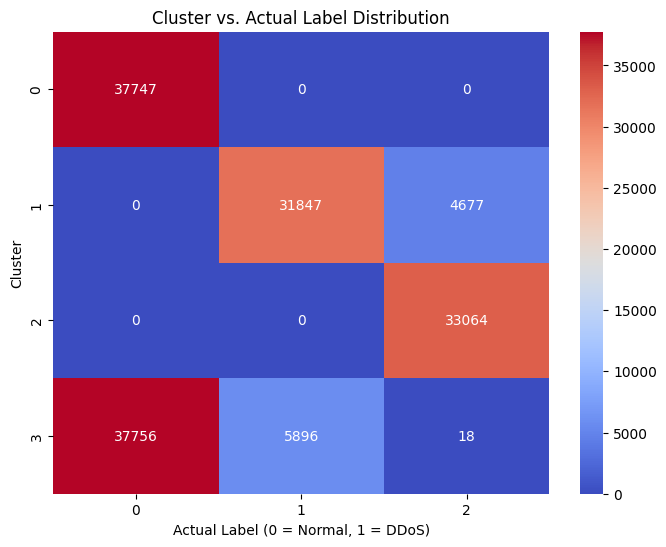

Confusion Matrix:
 [[37747     0     0 37756]
 [    0 31847     0  5896]
 [    0  4677 33064    18]
 [    0     0     0     0]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67     75503
           1       0.87      0.84      0.86     37743
           2       1.00      0.88      0.93     37759
           3       0.00      0.00      0.00         0

    accuracy                           0.68    151005
   macro avg       0.72      0.55      0.61    151005
weighted avg       0.97      0.68      0.78    151005



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# 1. Remove rows with missing values
df.dropna(inplace=True)

# 2. Encode the Label column (Convert 'DDoS' / 'Normal' to 0 or 1 if it's string-based)
#    Make sure your dataset actually has a column named 'Label'
if df['Label'].dtype == object:
    df['Label'] = LabelEncoder().fit_transform(df['Label'])

# 3. Identify numeric columns (excluding 'Label') for scaling
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Label' in numeric_cols:
    numeric_cols.remove('Label')  # Don't scale the label

# 4. Scale only the numeric columns using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numeric_cols])

# 5. K-Means Clustering (assume k=4 from elbow method, adjust if needed)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 6. Compare Clusters with the Actual Label
#    (Ensure 'Label' column exists and is numeric now)
comparison_table = pd.crosstab(df['Cluster'], df['Label'],
                               rownames=['Cluster'], colnames=['Actual Label'])
print("Cluster-Label Distribution:\n", comparison_table)

# 7. Visualize Cluster vs. Actual Label Distribution
plt.figure(figsize=(8, 6))
sns.heatmap(comparison_table, annot=True, cmap="coolwarm", fmt="d")
plt.xlabel("Actual Label (0 = Normal, 1 = DDoS)")
plt.ylabel("Cluster")
plt.title("Cluster vs. Actual Label Distribution")
plt.show()

# 8. Evaluate with a Confusion Matrix and Classification Report
y_true = df['Label']      # Actual labels
y_pred = df['Cluster']    # K-Means cluster assignments
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_true, y_pred))

# 9. (Optional) Save the clustered dataset
df.to_csv("clustered_dataset.csv", index=False)
